In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.colors as pc

In [2]:
subjects = pd.read_csv("../data/treadmill/subject-info.csv")
measures = pd.read_csv("../data/treadmill/test_measure.csv")

subjects = subjects.sort_values(by=["ID_test"])
measures = measures.sort_values(by=["ID_test", "time"])

measures["O2_rate"] = measures["VO2"]
measures["CO2_rate"] = measures["VCO2"]
measures["air_rate"] = measures["VE"]

measures["O2_vol"] = measures["O2_rate"] / measures["RR"]
measures["CO2_vol"] = measures["CO2_rate"] / measures["RR"]
measures["air_vol"] = measures["air_rate"] / measures["RR"]

measures["O2_cum"] = measures.groupby("ID_test")["O2_vol"].cumsum()
measures["CO2_cum"] = measures.groupby("ID_test")["CO2_vol"].cumsum()
measures["air_cum"] = measures.groupby("ID_test")["air_vol"].cumsum()

measures = measures.drop(columns=["VO2", "VCO2", "VE"])

# Define numerical features
measures_numerical = {'time', 'Speed', 'HR', 'RR', 'O2_rate', 'CO2_rate',
       'air_rate', 'O2_vol', 'CO2_vol', 'air_vol', 'O2_cum', 'CO2_cum',
       'air_cum', 'Age', 'Weight', 'Height', 'Humidity', 'Temperature'}

Visualizing physiology data

In [3]:
measures.head()

,time,Speed,HR,RR,ID_test,ID,O2_rate,CO2_rate,air_rate,O2_vol,CO2_vol,air_vol,O2_cum,CO2_cum,air_cum
68847,0,5.0,NaN,20,100_1,100,386.0,256.0,10.1,19.300000,12.800000,0.505000,19.300000,12.800000,0.505000
68848,2,5.0,NaN,26,100_1,100,617.0,423.0,14.2,23.730769,16.269231,0.546154,43.030769,29.069231,1.051154
68849,5,5.0,54.0,20,100_1,100,386.0,255.0,10.1,19.300000,12.750000,0.505000,62.330769,41.819231,1.556154
68850,7,5.0,NaN,23,100_1,100,488.0,329.0,11.9,21.217391,14.304348,0.517391,83.548161,56.123579,2.073545
68851,9,5.0,91.0,25,100_1,100,506.0,344.0,12.8,20.240000,13.760000,0.512000,103.788161,69.883579,2.585545


Visualize Ventilation curve

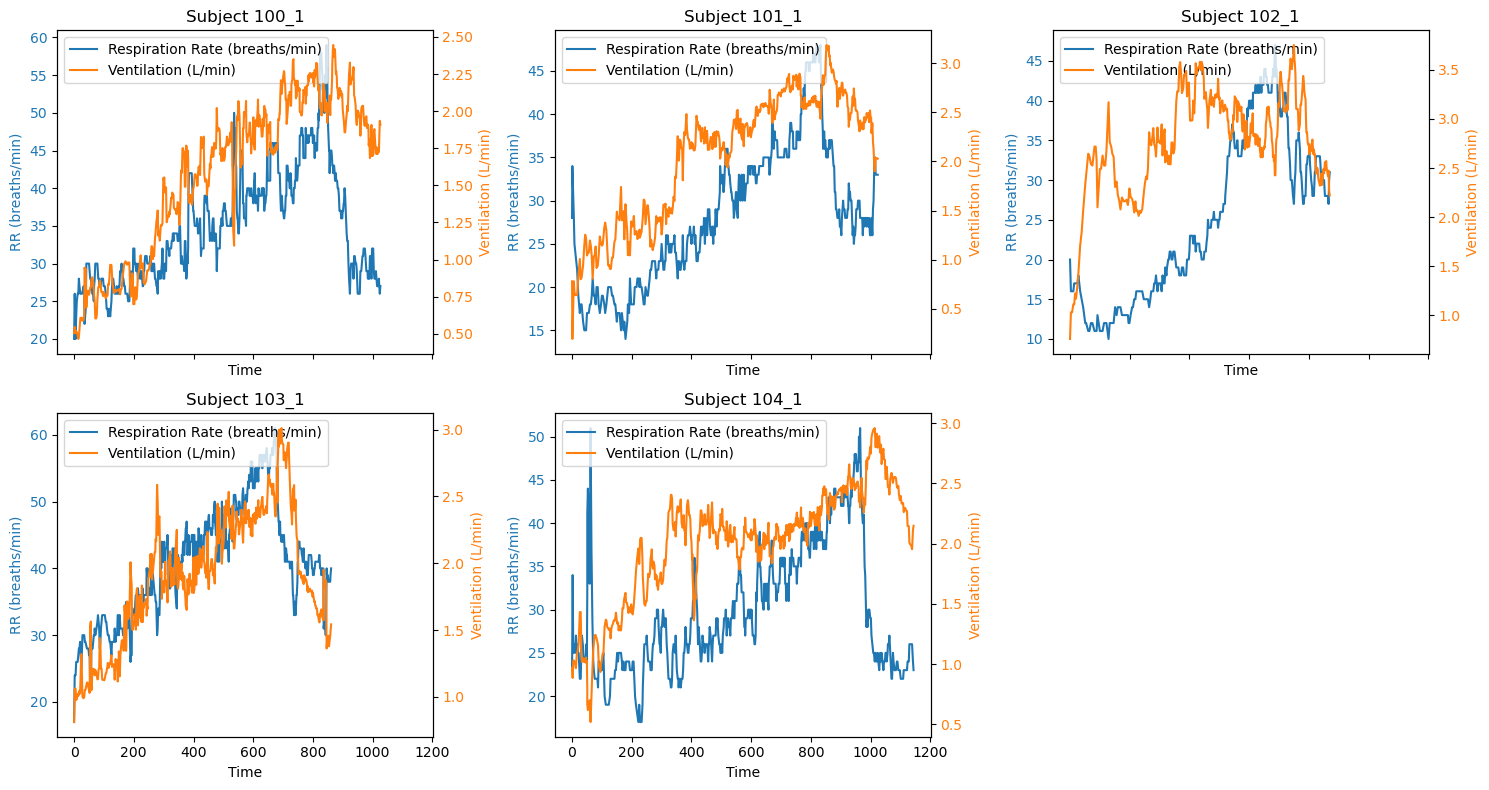

In [4]:
import matplotlib.pyplot as plt
import math

def plot_rr_and_ventilation_dual_axis(measures, subject_ids, cols=3):
    """
    Plot RR and ventilation for given subject IDs using dual y-axes,
    arranged in a dynamic grid of subplots.
    """
    n = len(subject_ids)
    rows = math.ceil(n / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), sharex=True)
    axes = axes.flatten() if n > 1 else [axes]

    for ax, sid in zip(axes, subject_ids):
        df = measures[measures['ID_test'] == sid]
        # Primary axis: Respiration Rate
        l1, = ax.plot(df['time'], df['RR'], color='tab:blue', label='Respiration Rate (breaths/min)')
        ax.set_ylabel('RR (breaths/min)', color='tab:blue')
        ax.tick_params(axis='y', labelcolor='tab:blue')

        # Secondary axis: Ventilation
        ax2 = ax.twinx()
        l2, = ax2.plot(df['time'], df['air_vol'], color='tab:orange', label='Ventilation (L/min)')
        ax2.set_ylabel('Ventilation (L/min)', color='tab:orange')
        ax2.tick_params(axis='y', labelcolor='tab:orange')

        ax.set_title(f'Subject {sid}')
        ax.set_xlabel('Time')

        # Combine legends from both axes
        lines = [l1, l2]
        labels = [ln.get_label() for ln in lines]
        ax.legend(lines, labels, loc='upper left')

    # Remove any unused subplots
    for ax in axes[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()


subjects_5 = measures['ID_test'].unique()[:5]
plot_rr_and_ventilation_dual_axis(measures, subjects_5)

Respiratory Exchange Ratio (RER)

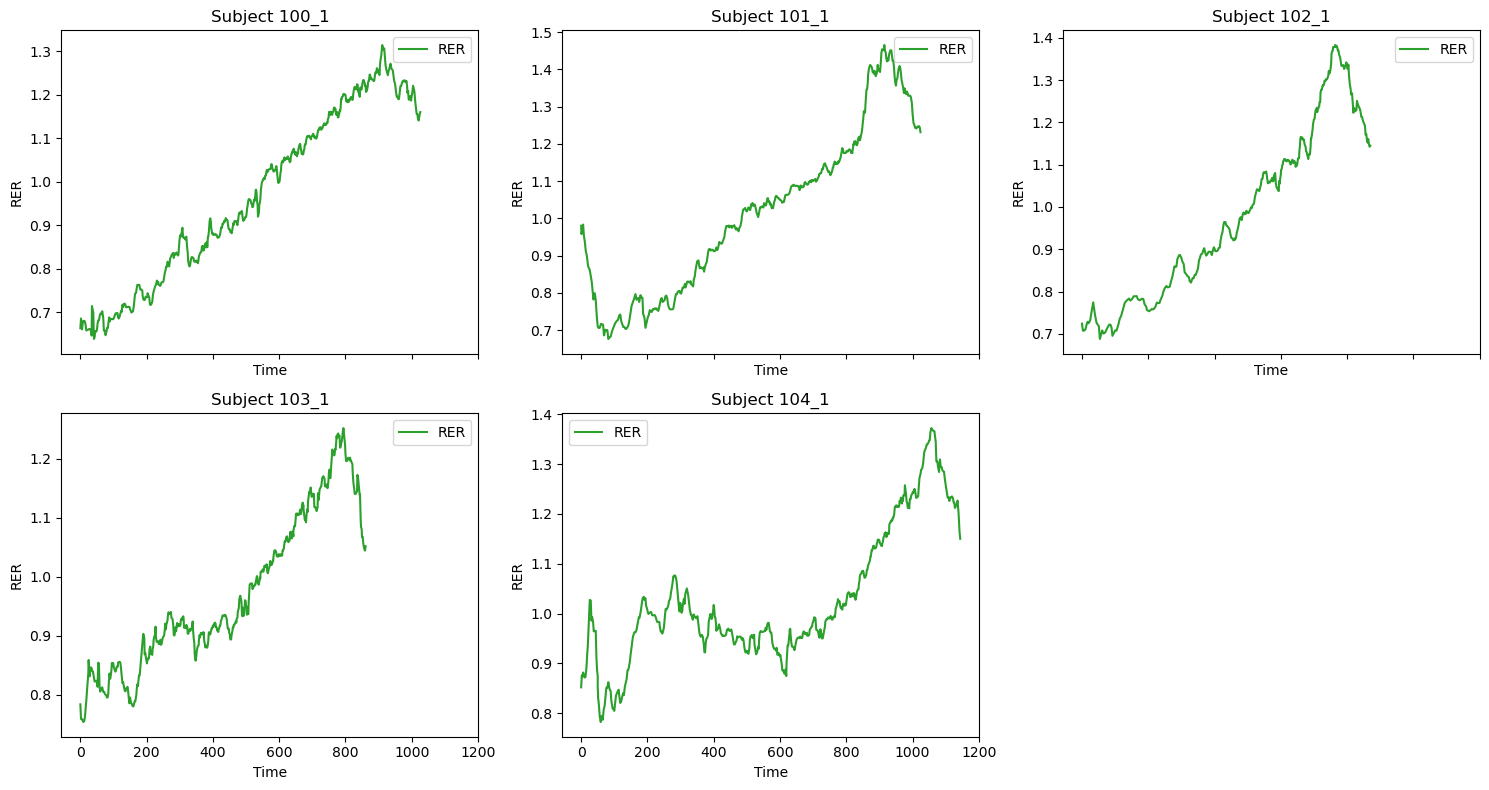

In [5]:
# Code snippet to plot RER for multiple subjects in a flexible grid (similar to VE plotting)

import matplotlib.pyplot as plt
import math

def plot_rer(measures, subject_ids, cols=3):
    """
    Plot Respiratory Exchange Ratio (RER = VCO2_rate / VO2_rate) for given subject IDs,
    arranged in a dynamic grid of subplots.
    """
    # Compute RER
    measures['RER'] = measures['CO2_rate'] / measures['O2_rate']
    
    n = len(subject_ids)
    rows = math.ceil(n / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), sharex=True)
    axes = axes.flatten() if n > 1 else [axes]

    for ax, sid in zip(axes, subject_ids):
        df = measures[measures['ID_test'] == sid]
        ax.plot(df['time'], df['RER'], color='tab:green', label='RER')
        ax.set_title(f'Subject {sid}')
        ax.set_xlabel('Time')
        ax.set_ylabel('RER')
        ax.legend()

    # Remove any unused subplots
    for ax in axes[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

# Example usage:
subject_list = measures['ID_test'].unique()[:5]  # adjust for the subjects you want
plot_rer(measures, subject_list, cols=3)

Visualizing some subject information

In [6]:
subjects.head()

,Age,Weight,Height,Humidity,Temperature,Sex,ID,ID_test
879,42.1,76.0,167.0,39.0,17.60,0,100,100_1
852,41.0,81.0,173.0,39.0,17.60,0,101,101_1
639,31.9,108.0,179.0,47.0,18.09,0,102,102_1
664,33.0,101.0,199.0,47.0,18.09,0,103,103_1
622,31.4,78.0,176.0,48.0,21.50,0,104,104_1


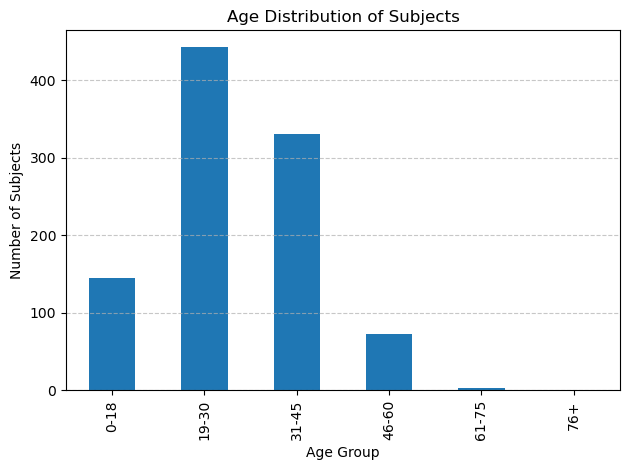

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

bins = [0, 18, 30, 45, 60, 75, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76+']
subjects['age_group'] = pd.cut(subjects['Age'], bins=bins, labels=labels, right=False)

# 2. Plot the histogram (bar plot of age groups)
subjects['age_group'].value_counts(sort=False).plot(kind='bar')

# 3. Customize the plot
plt.xlabel('Age Group')
plt.ylabel('Number of Subjects')
plt.title('Age Distribution of Subjects')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

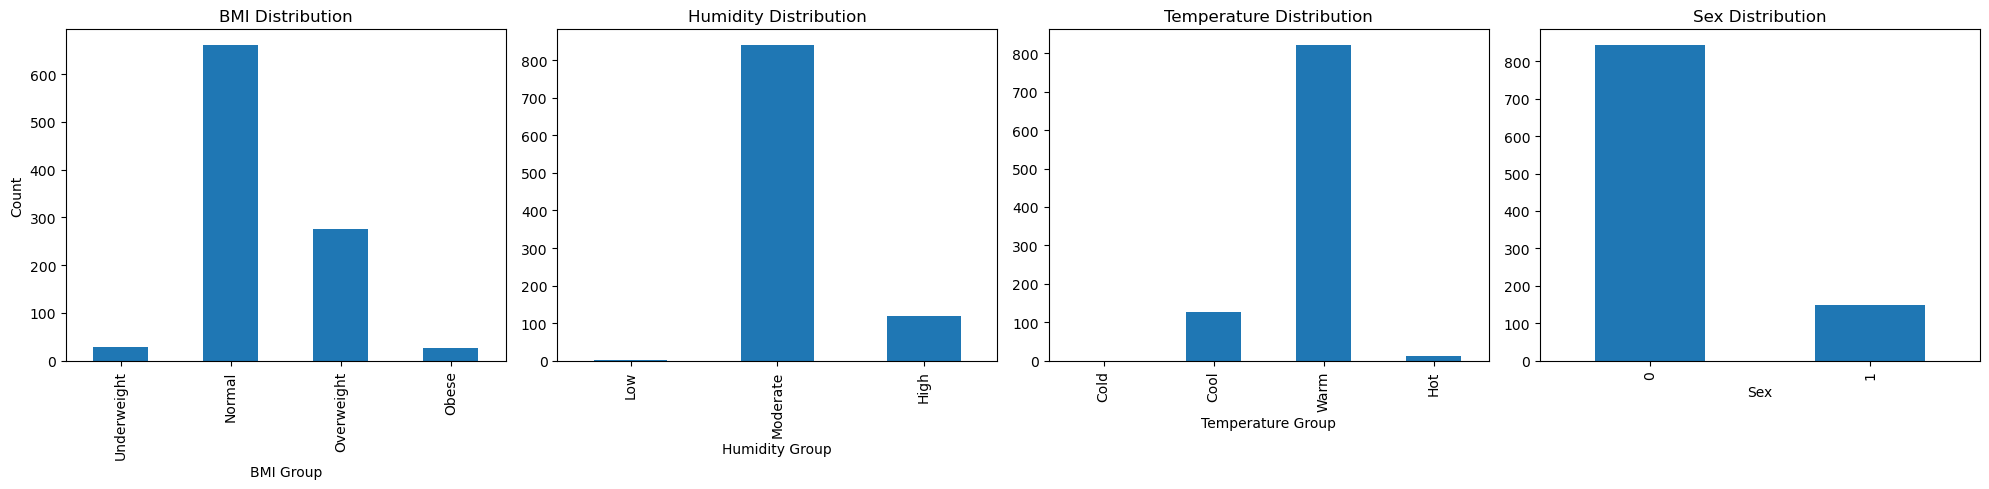

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Compute BMI ---
# BMI = weight (kg) / height (m)^2
subjects['Height_m'] = subjects['Height'] / 100  # convert cm to m if needed
subjects['BMI'] = subjects['Weight'] / (subjects['Height_m'] ** 2)

# --- Bin BMI ---
bmi_bins = [0, 18.5, 24.9, 29.9, 40]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
subjects['BMI_group'] = pd.cut(subjects['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

# --- Bin Humidity ---
humidity_bins = [0, 30, 60, 100]
humidity_labels = ['Low', 'Moderate', 'High']
subjects['Humidity_group'] = pd.cut(subjects['Humidity'], bins=humidity_bins, labels=humidity_labels, right=False)

# --- Bin Temperature ---
temperature_bins = [0, 10, 20, 30, 40]
temperature_labels = ['Cold', 'Cool', 'Warm', 'Hot']
subjects['Temperature_group'] = pd.cut(subjects['Temperature'], bins=temperature_bins, labels=temperature_labels, right=False)

# --- Plot all histograms ---
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot BMI
subjects['BMI_group'].value_counts(sort=False).plot(kind='bar', ax=axes[0])
axes[0].set_title('BMI Distribution')
axes[0].set_xlabel('BMI Group')
axes[0].set_ylabel('Count')

# Plot Humidity
subjects['Humidity_group'].value_counts(sort=False).plot(kind='bar', ax=axes[1])
axes[1].set_title('Humidity Distribution')
axes[1].set_xlabel('Humidity Group')

# Plot Temperature
subjects['Temperature_group'].value_counts(sort=False).plot(kind='bar', ax=axes[2])
axes[2].set_title('Temperature Distribution')
axes[2].set_xlabel('Temperature Group')

# Plot Sex
subjects['Sex'].value_counts().plot(kind='bar', ax=axes[3])
axes[3].set_title('Sex Distribution')
axes[3].set_xlabel('Sex')

plt.tight_layout()
plt.show()